In [1]:
!pip install tensorflow-probability==0.7.0 --user
!pip install tensorflow-gpu==1.14.0 --user
!pip install keras==2.2.4 --user
!pip install seaborn --user

You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [9]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import os

os.environ['CUDA_VISIBLE_DEVICES'] = '0'

from csnl import DataGeneratorWithLabels, DataGenerator, DenseLadderVAE, \
DenseLinLinLadderVAE, VAEPlotter, ModelTrainer

In [19]:
data_gen_labels = DataGeneratorWithLabels(image_shape=(28, 28, 1),
                                          batch_size=500,
                                          file_path=os.getcwd() +
                                          '/csnl/data/textures_42000_28px.pkl',
                                          whiten=False,
                                          contrast_normalize=True)

Training size : 37800 	 Test size : 4200
Shapes :  (37800, 28, 28, 1) 	 (4200, 28, 28, 1)
Label shaped :  (37800,) 	 (4200,)
Train set : 
Mean: 0.430, Standard Deviation: 0.082
Min: 0.000, Max: 1.000
Test set : 
Mean: 0.430, Standard Deviation: 0.082
Min: 0.161, Max: 0.700
Train SHAPE :  (37800, 28, 28, 1)
MEAN :  {0: 0.4302916120576672, 1: 0.4302916120576671, 2: 0.4302916120576672, 3: 0.4302916120576667, 4: 0.4302916120577751, 5: 0.4302916120576675, 6: 0.4302916120576671, 7: nan, 8: nan, 9: nan}
STD :  {0: 0.08191349934469198, 1: 0.08191349934469201, 2: 0.08191349934469204, 3: 0.08191349934469204, 4: 0.08191349932320294, 5: 0.081913499344692, 6: 0.08191349934469205, 7: nan, 8: nan, 9: nan}
Test SHAPE :  (4200, 28, 28, 1)
MEAN :  {0: 0.4302916120576672, 1: 0.4302916120576669, 2: 0.43029161205766703, 3: 0.4302916120576671, 4: 0.43029161205766703, 5: 0.4302916120576669, 6: 0.43029161205766714, 7: nan, 8: nan, 9: nan}
STD :  {0: 0.08191349934469203, 1: 0.08191349934469201, 2: 0.0819134993

/home/qbeer666/.local/lib/python3.5/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/qbeer666/.local/lib/python3.5/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/qbeer666/.local/lib/python3.5/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/qbeer666/.local/lib/python3.5/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/qbeer666/.local/lib/python3.5/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [20]:
data_gen = DataGenerator(image_shape=(28, 28, 1),
                         batch_size=500,
                         file_path=os.getcwd() +
                         '/csnl/data/textures_42000_28px.pkl',
                         whiten=False,
                         contrast_normalize=True)

Training size : 37800 	 Test size : 4200
Shapes :  (37800, 28, 28, 1) 	 (4200, 28, 28, 1)
Label shaped :  (37800,) 	 (4200,)
Train set : 
Mean: 0.430, Standard Deviation: 0.082
Min: 0.000, Max: 1.000
Test set : 
Mean: 0.430, Standard Deviation: 0.082
Min: 0.161, Max: 0.700
Train set : 
Mean: 0.430, Standard Deviation: 0.082
Min: 0.000, Max: 1.000
Train SHAPE :  (37800, 28, 28, 1)
Test SHAPE :  (4200, 28, 28, 1)


In [21]:
LATENT_DIM1 = 16 * 8
LATENT_DIM2 = 8

vae = DenseLadderVAE(input_shape=(500, 28*28),
                    latent_dim1=LATENT_DIM1,
                    latent_dim2=LATENT_DIM2)

In [22]:
trainer = ModelTrainer(vae,
                       data_gen,
                       loss_fn="normal",
                       lr=5e-4,
                       decay=1e-4,
                       beta=1)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (500, 784)           0                                            
__________________________________________________________________________________________________
dense_encoder_1 (Model)         multiple             1492864     input_8[0][0]                    
__________________________________________________________________________________________________
dense_encoder_2 (Model)         multiple             263168      dense_encoder_1[1][0]            
__________________________________________________________________________________________________
mean_z2 (Dense)                 (500, 8)             2056        dense_encoder_2[1][0]            
__________________________________________________________________________________________________
log_sigma_

In [23]:
trainer.model.load_weights('./results/model.h5')
trainer.generator.load_weights('./results/generator_model.h5')
trainer.latent_model.load_weights('./results/latent_model.h5')

In [24]:
plotter = VAEPlotter(trainer, data_gen, data_gen_labels, grid_size=8)

50/50 [==============================] - 1s 17ms/step


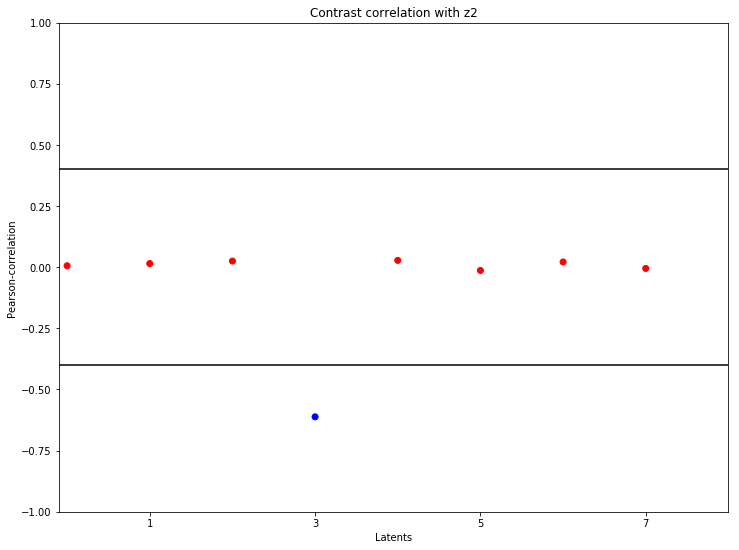

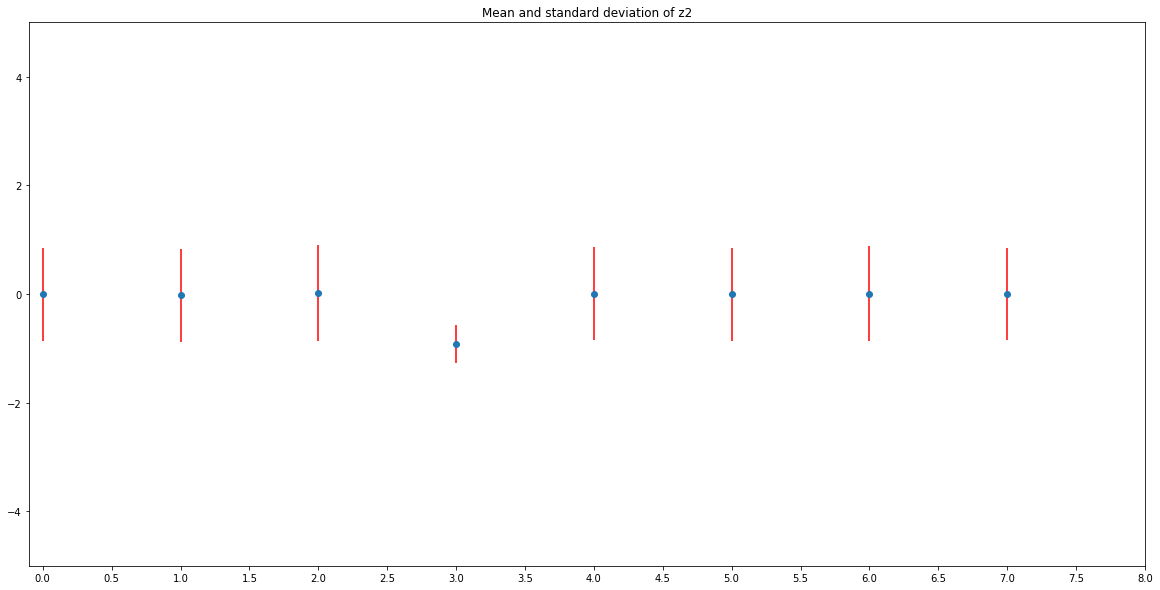

In [25]:
plotter.plot_contrast_correlations()

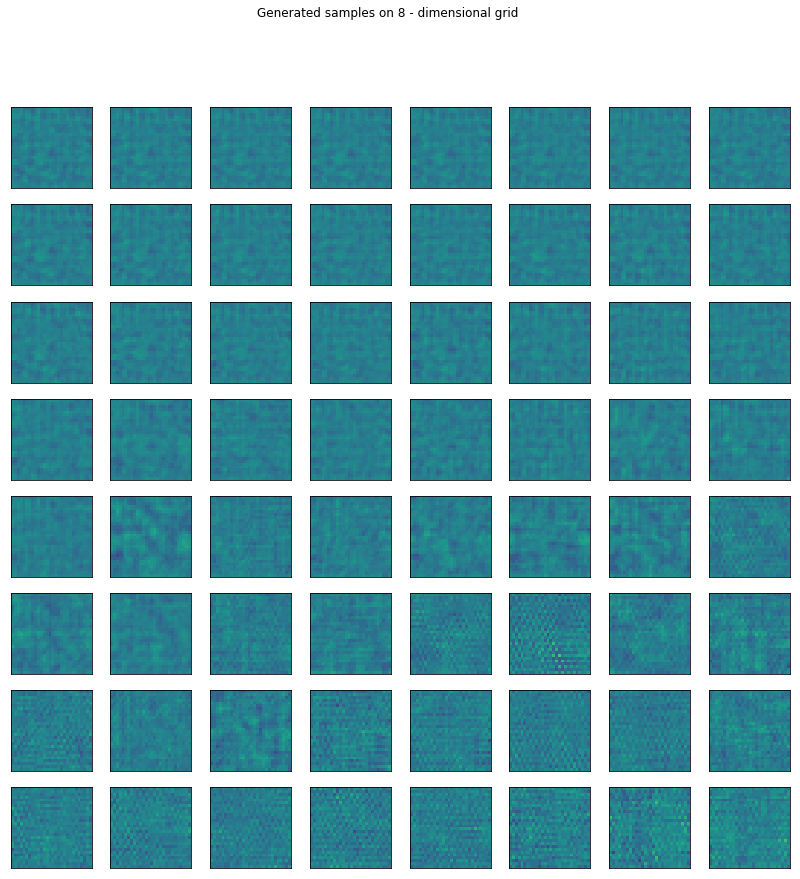

In [28]:
plotter.visualize_latent(axis=3, sweep_from=-2, sweep_to=.5) # 3 sigma

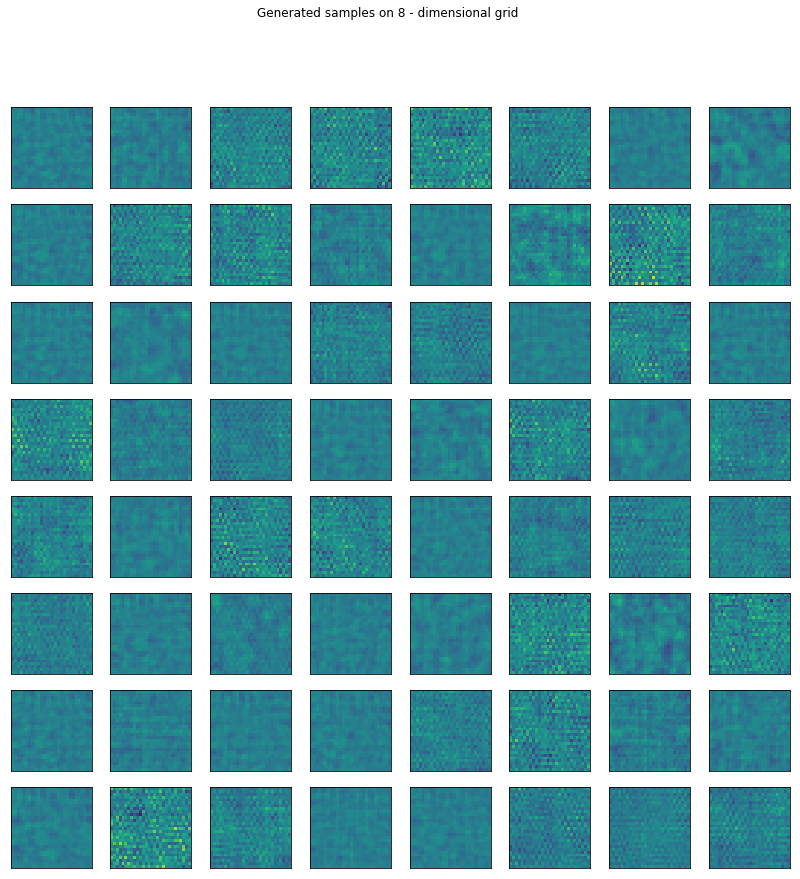

In [27]:
plotter.generate_samples()